Ejemplo --- Regresión no lineal univariada usando MLP en TensorFlow
===

* *15 min* | Última modificación: Junio 22, 2019.

Este documento presenta los ejemplos desarrollados en el tutorial *Regresión no lineal univariada con perceptrones multicapa en R* usando el lenguaje Python.

## Datos del problema planteado

Se desea construir un modelo de regresión no lineal para la siguiente muestra de 31 observaciones de $(x, y)$. 

In [1]:
x = [-3.5000, -3.2941, -3.0882, -2.8824, -2.6765, 
     -2.4706, -2.2647, -2.0588, -1.8529, -1.6471, 
     -1.4412, -1.2353, -1.0294, -0.8235, -0.6176, 
     -0.4118, -0.2059,  0.0000,  0.2059,  0.4118, 
      0.6176,  0.8235,  1.0294,  1.2353,  1.4412, 
      1.6471,  1.8529,  2.0588,  2.2647,  2.4706, 
      2.6765,  2.8824,  3.0882,  3.2941,  3.5000]

d = [ 0.0000,  0.0000,  0.0001,  0.0002,  0.0008,  
      0.0022,  0.0059,  0.0144,  0.0323,  0.0664,  
      0.1253,  0.2174,  0.3466,  0.5075,  0.6828,  
      0.8440,  0.9585,  1.0000,  0.9585,  0.8440,  
      0.6828,  0.5075,  0.3466,  0.2174,  0.1253,  
      0.0664,  0.0323,  0.0144,  0.0059,  0.0022,  
      0.0008,  0.0002,  0.0001,  0.0000,  0.0000]

In [2]:
import matplotlib.pyplot as plt

plt.plot(x, d, 'o')
plt.grid()

## Solución

A continuación se presenta el código en TensorFlow. Aquí se modela el perceptrón multicapa, como una red densa (totalmente conectada) con 3 neuronas en la capa oculta

In [4]:
##
## En esta celda se configura el modelo
##

import tensorflow as tf

## Crea el modelo vacio sin capas
model = tf.keras.Sequential()

## Agrega la capa oculta
model.add(tf.keras.layers.Dense(3,                         # una neurona en la capa oculta   
                                activation=tf.nn.sigmoid,  # función de activación
                                input_shape = (1,)))       # una neurona de entrada

## Agrega la capa de salida
model.add(tf.keras.layers.Dense(1,                         # una neurona de salida
                                activation=tf.nn.sigmoid)) # capa de salida

## Imprime el reporte de configuración del modelo
model.summary()          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


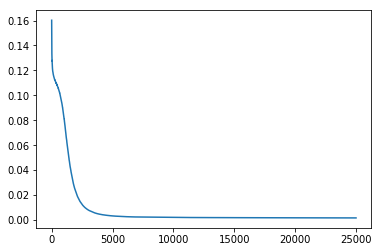

In [5]:
##
## En esta celda se realiza el entrenamiento del modelo
##

## Optimizacion usando gradiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

## Compila el modelo
model.compile(optimizer=optimizer,     # optimizador
              loss='mse',              # función a minimizar
              metrics=['mse', 'mae'])  # metricas a reportar

## Entrena el modelo y guarda 
## el reporte de entrenamiento
history = model.fit(x, d, epochs=25000, verbose=0)

## grafico del error versus la iteración
plt.plot(history.epoch, np.array(history.history['loss']));


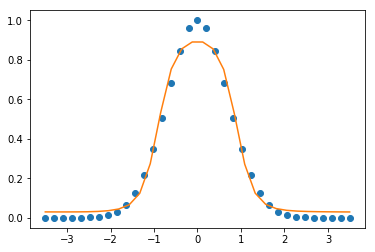

In [6]:
##
## Uso del modelo
##

## Pronosto para una malla densa del eje X
x_pred = np.linspace(start=-3.5, stop=3.5, num=30)
y_pred = model.predict(x_pred)

## grafico comparativo
plt.plot(x, d, 'o');
plt.plot(x_pred, y_pred);